**<center>* Assignment 7: CLUSTERING   *</center>**

DATASCIENCE

name: GUVVALA SOMASEKHAR REDDY

mail: showmove5697@gmail.com

In [ ]:
# import clustering libraries
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Problem-1)
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

#Solution:

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data.csv


In [ ]:
crime=pd.read_csv('crime_data.csv',encoding='ISO-8859-1')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


##Basic & EDA

In [ ]:
crime.rename(columns={'Unnamed: 0':'state'}, inplace=True)
crime.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime.duplicated().value_counts()

False    50
dtype: int64

observation: No duplication in data

In [ ]:
crime.isna().sum()

state       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

observation: No null values in data

## Visualizing data points

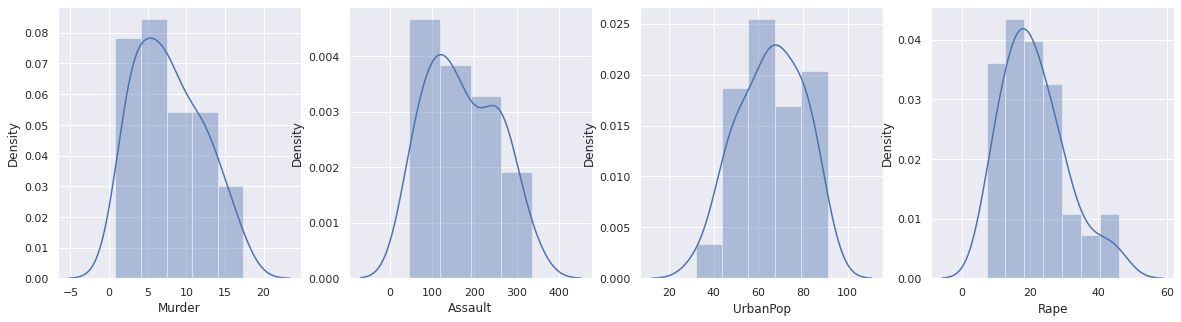

In [ ]:
#plotting distplots to observe datapoints nature
plt.figure(figsize=(20,5))
for i, column in enumerate(crime.drop('state',axis=1).columns, 1):
  plt.subplot(1,4,i)
  sns.distplot(crime[column])

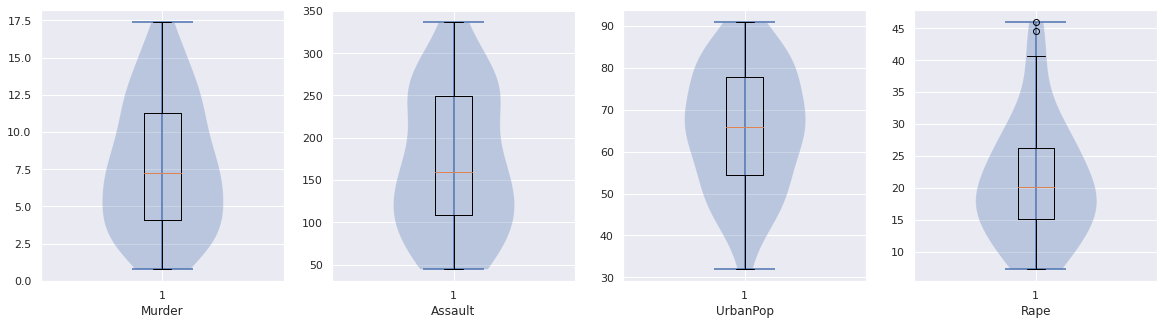

In [ ]:
#plotting boxplots
plt.figure(figsize=(20,5))
for i, column in enumerate(crime.drop('state',axis=1).columns, 1):
  plt.subplot(1,4,i)
  plt.violinplot(crime[column])
  plt.boxplot(crime[column])
  plt.xlabel(crime[column].name)

observation: There are no outliers in features except rape feature in the data set

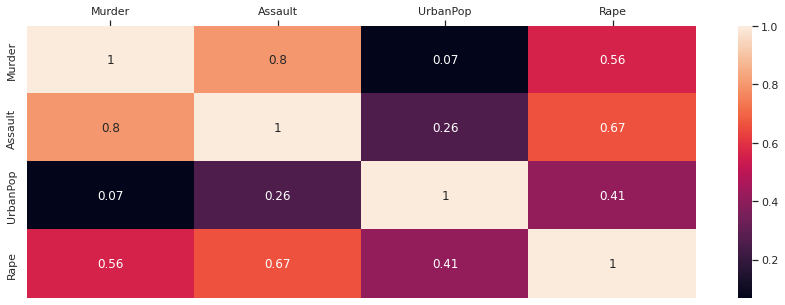

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(15,5))
ax = sns.heatmap(crime.corr(), annot=True)
ax.xaxis.tick_top()

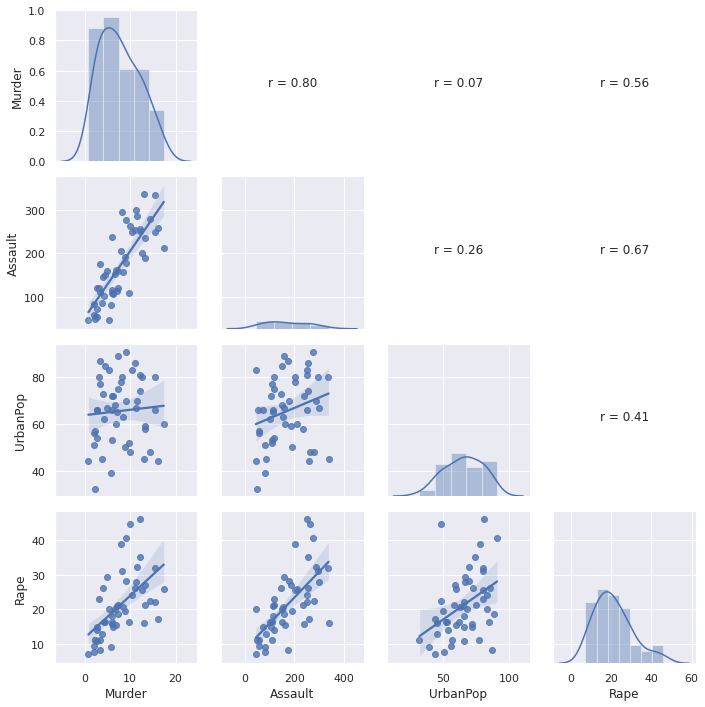

In [ ]:
# creating  pairGrid with correlation coefficients
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(crime)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

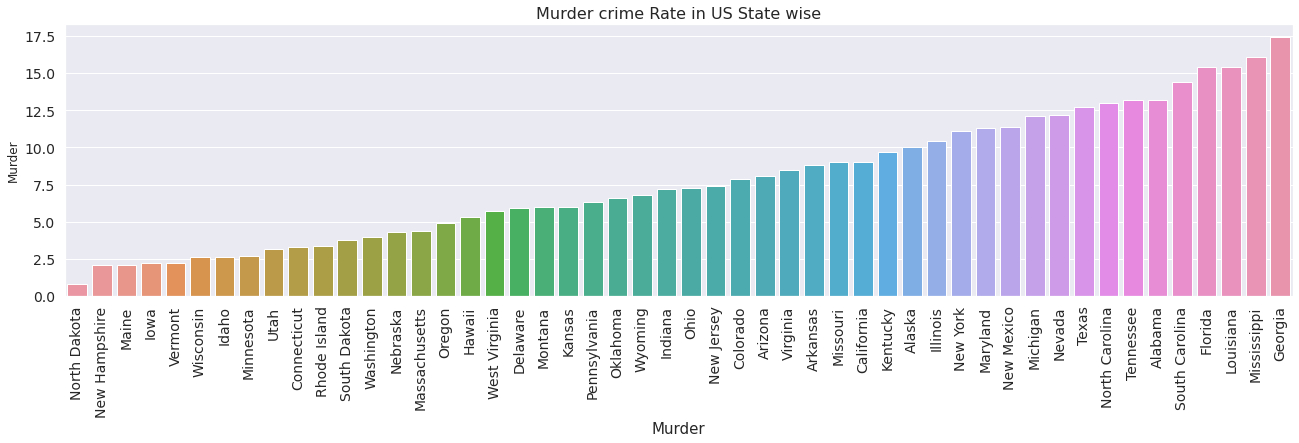

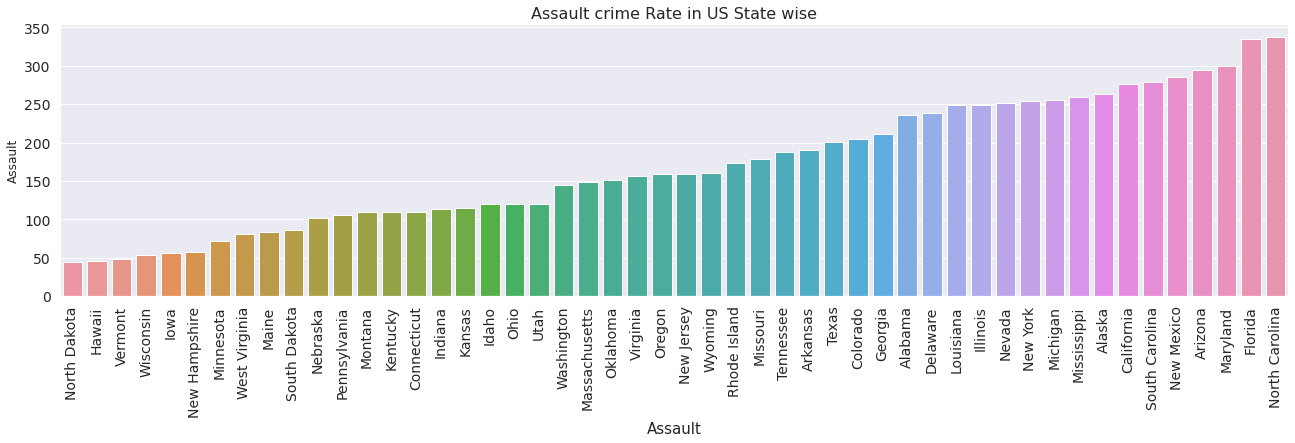

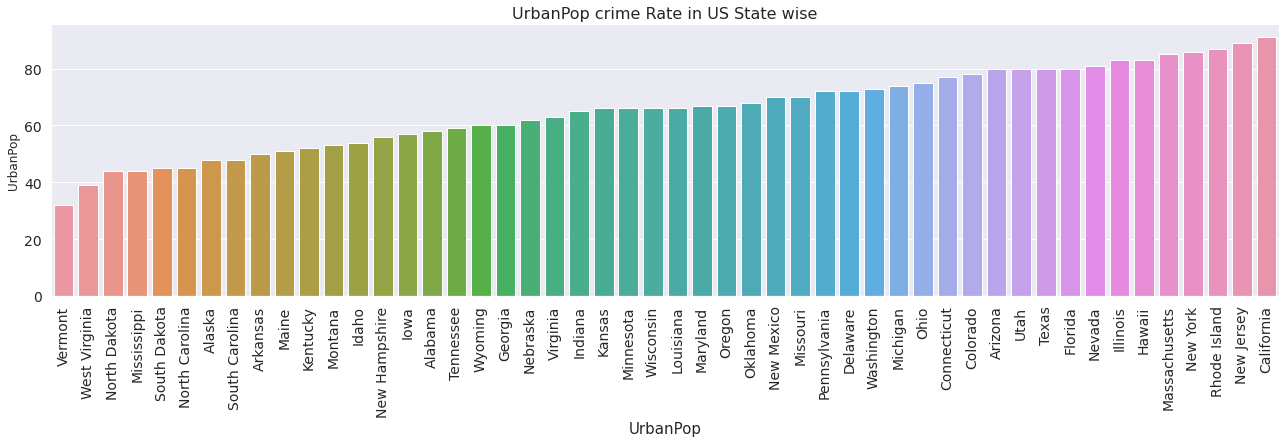

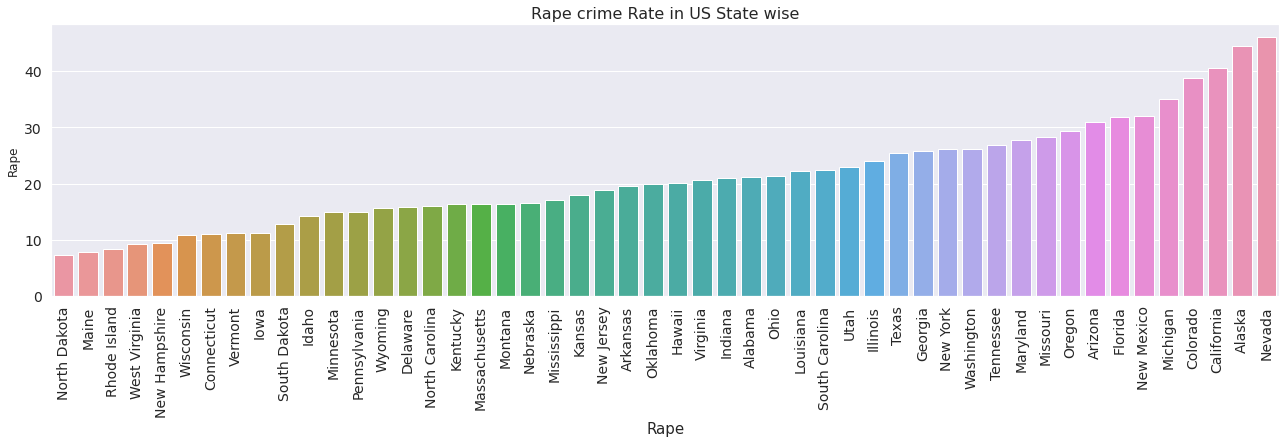

In [ ]:
#  barplot and sorted bars
for i, column in enumerate(crime.drop('state',axis=1).columns, 1):
   plt.figure(figsize=(22,5))
   sns.barplot(x='state', y=column, data=crime, order=crime.sort_values(column).state)
   plt.xlabel("state", size=15)
   plt.xlabel(crime[column].name)
   plt.yticks(rotation = 0, fontsize = 14)
   plt.xticks(rotation = 90, fontsize = 14)
   plt.title(crime[column].name + " crime Rate in US State wise", size=16)
   plt.show()

##Standardisation


In [ ]:
# Standardisation function  , for normalization MinMaxScalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
crime_scaled=scaler.fit_transform(crime.iloc[:,1:])
crime_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
#silhouette_score
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7]

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(crime_scaled)
        silhouette_score1 = silhouette_score(crime_scaled, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

##Hierarchical Clustering:

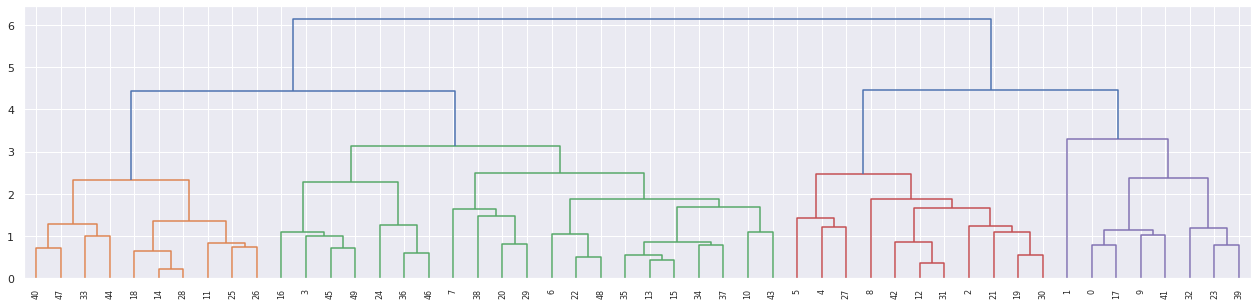

In [ ]:
# dendogram
plt.figure(figsize=(22,5))
dendrogram = sch.dendrogram(sch.linkage(crime_scaled, method='complete'))

In [ ]:
#creating clusters
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [ ]:
hc.fit(crime_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [ ]:
#saving clusters for chart ,# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
y_hc=hc.fit_predict(crime_scaled)
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1])

In [ ]:
crime_hierarchical=crime.copy()
#adding clusterid col
crime_hierarchical['h_clusterid']=y_hc
crime_hierarchical.head()

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [ ]:
crime_hierarchical[crime_hierarchical['h_clusterid']==0]

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [ ]:
crime_hierarchical[crime_hierarchical['h_clusterid']==1]

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
24,Missouri,9.0,178,70,28.2,1


In [ ]:
crime_hierarchical[crime_hierarchical['h_clusterid']==2]

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
27,Nevada,12.2,252,81,46.0,2
30,New Mexico,11.4,285,70,32.1,2
31,New York,11.1,254,86,26.1,2


In [ ]:
crime_hierarchical[crime_hierarchical['h_clusterid']==3]

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
18,Maine,2.1,83,51,7.8,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3
44,Vermont,2.2,48,32,11.2,3
47,West Virginia,5.7,81,39,9.3,3


In [ ]:
crime_hierarchical.h_clusterid.value_counts()

1    21
2    11
3    10
0     8
Name: h_clusterid, dtype: int64

In [ ]:
crime_hierarchical.groupby('h_clusterid').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
h_clusterid,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


In [ ]:
#Visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(crime_scaled)
pca_2d = pca.transform(crime_scaled)

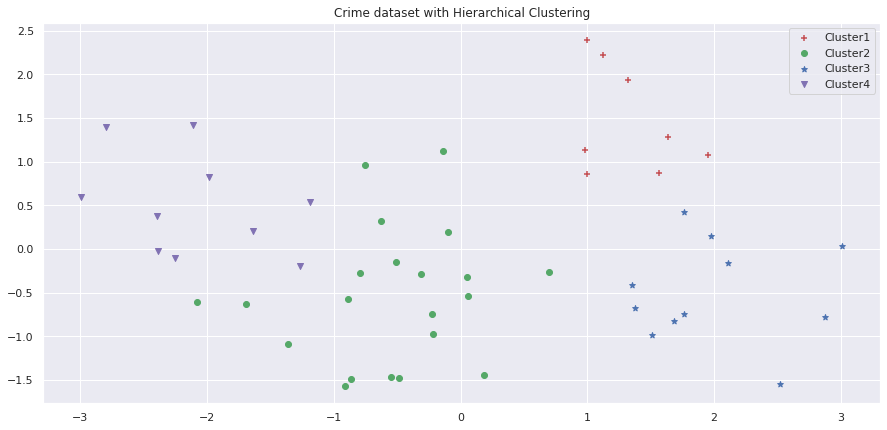

In [ ]:
import pylab as pl
plt.figure(figsize=(15,7))
for i in range(0, pca_2d.shape[0]):
    if crime_hierarchical.h_clusterid[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif crime_hierarchical.h_clusterid[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif crime_hierarchical.h_clusterid[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif crime_hierarchical.h_clusterid[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='v')
        
pl.legend([c1, c2, c3, c4], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4'])
pl.title('Crime dataset with Hierarchical Clustering')
pl.show()

##K-Means method:

In [ ]:
clusters_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clusters_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(crime_scaled)
    sil_score1= silhouette_score(crime_scaled, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)


For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364113
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


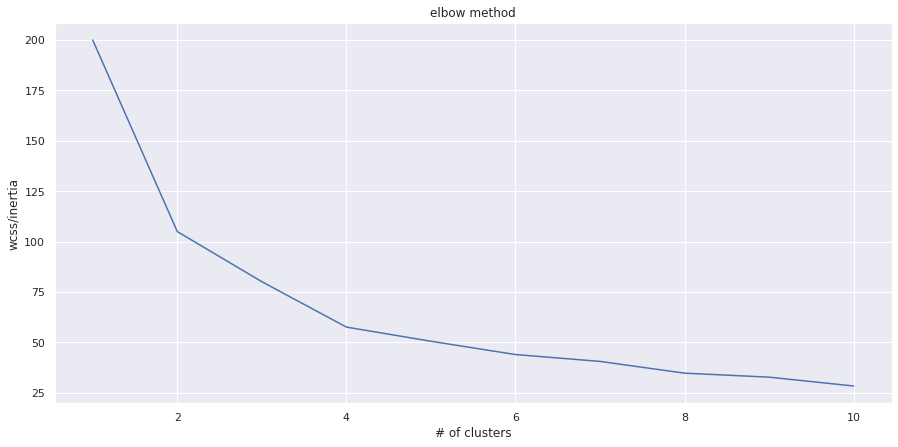

In [ ]:
#elbow method for k value
plt.figure(figsize=(15,7))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('elbow method')
plt.xlabel('# of clusters')
plt.ylabel('wcss/inertia')
plt.show()

observation: 4 clusters will be a better choice as per above methods.

In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(crime_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [ ]:
#Assign clusters to the data set
crime_kmeans=crime.copy()
crime_kmeans['kmeans_clusterid'] = clusters_new.labels_
crime_kmeans.head()

,state,Murder,Assault,UrbanPop,Rape,kmeans_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [ ]:
crime_kmeans['kmeans_clusterid'].value_counts()

0    16
2    13
3    13
1     8
Name: kmeans_clusterid, dtype: int64

In [ ]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [ ]:
crime_kmeans.groupby('kmeans_clusterid').agg(['mean']).reset_index()

,kmeans_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [ ]:
crime_kmeans[crime_kmeans['kmeans_clusterid']==0]

,state,Murder,Assault,UrbanPop,Rape,kmeans_clusterid
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [ ]:
crime_kmeans[crime_kmeans['kmeans_clusterid']==1]

,state,Murder,Assault,UrbanPop,Rape,kmeans_clusterid
0,Alabama,13.2,236,58,21.2,1
3,Arkansas,8.8,190,50,19.5,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


In [ ]:
crime_kmeans[crime_kmeans['kmeans_clusterid']==2]

,state,Murder,Assault,UrbanPop,Rape,kmeans_clusterid
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2


In [ ]:
crime_kmeans[crime_kmeans['kmeans_clusterid']==3]

,state,Murder,Assault,UrbanPop,Rape,kmeans_clusterid
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
16,Kentucky,9.7,109,52,16.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3


In [ ]:
#Visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(crime_scaled)
pca_2d = pca.transform(crime_scaled)

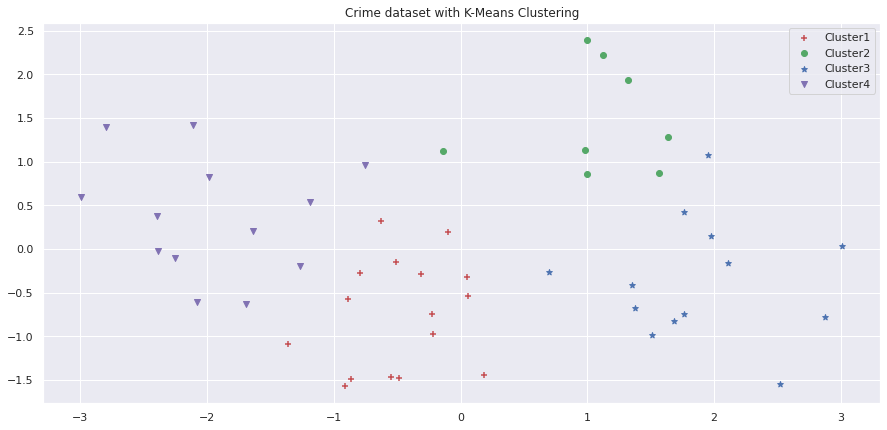

In [ ]:
import pylab as pl
plt.figure(figsize=(15,7))
for i in range(0, pca_2d.shape[0]):
    if crime_kmeans.kmeans_clusterid[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif crime_kmeans.kmeans_clusterid[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif crime_kmeans.kmeans_clusterid[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif crime_kmeans.kmeans_clusterid[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='v')
        
pl.legend([c1, c2, c3, c4], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4'])
pl.title('Crime dataset with K-Means Clustering')
pl.show()

##DBSCAN method:

In [ ]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit_predict(crime_scaled)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
crime_dbscan=crime.copy()
crime_dbscan['dbscan_clusterid'] = dbscan.labels_
crime_dbscan['dbscan_clusterid'].value_counts()

 1    28
-1    18
 0     4
Name: dbscan_clusterid, dtype: int64

In [ ]:
crime_dbscan.groupby('dbscan_clusterid').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
dbscan_clusterid,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143


In [ ]:
crime_dbscan[crime_dbscan.dbscan_clusterid==-1]

,state,Murder,Assault,UrbanPop,Rape,dbscan_clusterid
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1
10,Hawaii,5.3,46,83,20.2,-1
12,Illinois,10.4,249,83,24.0,-1


In [ ]:
crime_dbscan[crime_dbscan.dbscan_clusterid==0]

,state,Murder,Assault,UrbanPop,Rape,dbscan_clusterid
0,Alabama,13.2,236,58,21.2,0
17,Louisiana,15.4,249,66,22.2,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [ ]:
crime_dbscan[crime_dbscan.dbscan_clusterid==1]

,state,Murder,Assault,UrbanPop,Rape,dbscan_clusterid
6,Connecticut,3.3,110,77,11.1,1
11,Idaho,2.6,120,54,14.2,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
24,Missouri,9.0,178,70,28.2,1


In [ ]:
#Visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(crime_scaled)
pca_2d = pca.transform(crime_scaled)

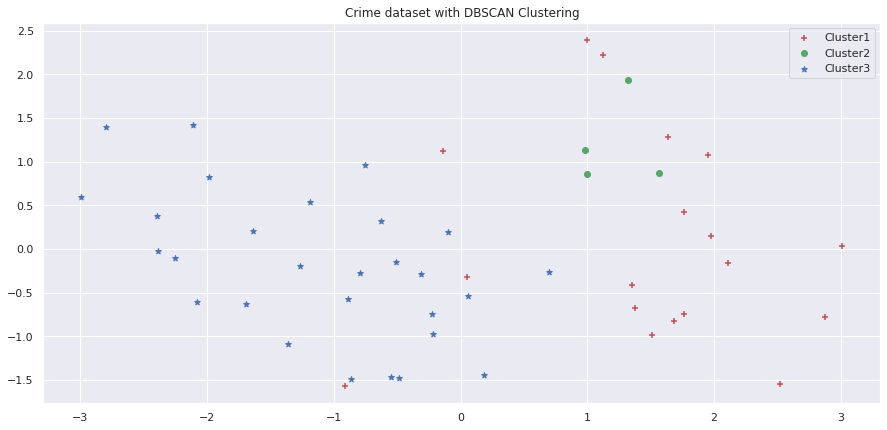

In [ ]:
import pylab as pl
plt.figure(figsize=(15,7))
for i in range(0, pca_2d.shape[0]):
    if crime_dbscan.dbscan_clusterid[i] == -1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif crime_dbscan.dbscan_clusterid[i] == 0:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif crime_dbscan.dbscan_clusterid[i] == 1:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
        
pl.legend([c1, c2, c3, c4], ['Cluster1', 'Cluster2',
    'Cluster3'])
pl.title('Crime dataset with DBSCAN Clustering')
pl.show()

#Conclusion:

* In each cluster method, the second cluster has more points when compared to the other clusters.

*   The clustering methods, hierarchical and K-means, almost grouped the similar points into the same cluster.
*   DBSCAN clustering performance is low when compared with k-means and hierarchical methods. because it is not placing all points of the cluster in one place for the gievn dataset.



#Problem-2)
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

#Solution:

In [ ]:
#data loading
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.csv to EastWestAirlines (2).csv


In [ ]:
airlines=pd.read_csv('EastWestAirlines.csv',index_col=0)
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [ ]:
airlines.rename(columns={'Award?':'award'}, inplace=True)
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


## BASIC and EDA

In [ ]:
airlines.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [ ]:
airlines.duplicated().value_counts()

False    3998
True        1
dtype: int64

obsevation: no duplication in data

In [ ]:
airlines.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
award                0
dtype: int64

observation: no null values in  features.

##Visualising Data points

In [ ]:
airlines.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0


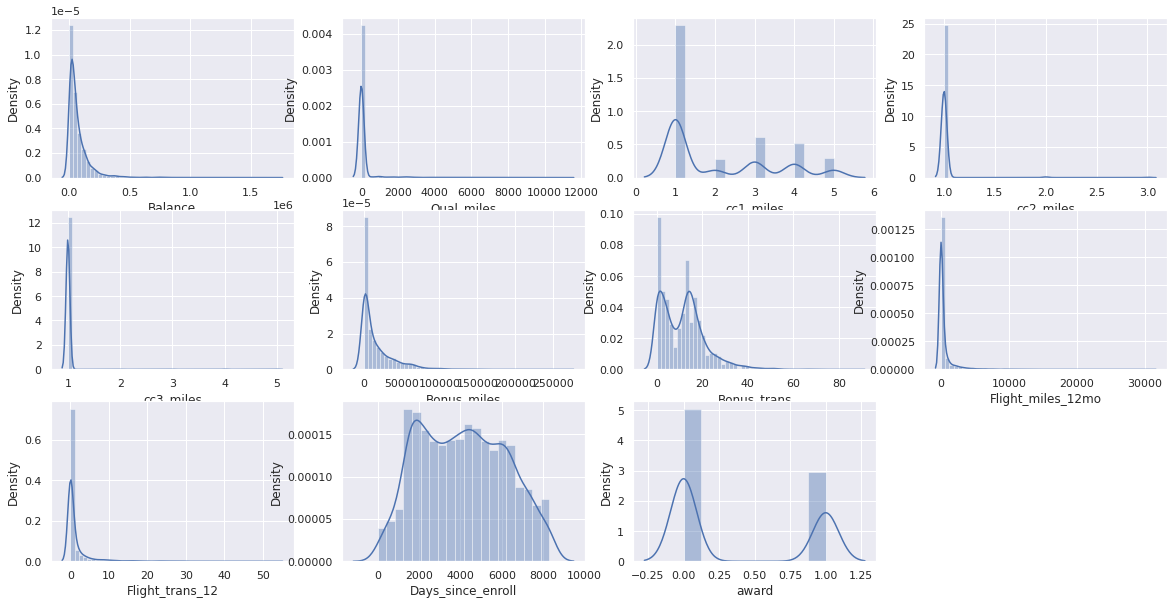

In [ ]:
#plotting distplots to observe datapoints nature
plt.figure(figsize=(20,10))
for i, column in enumerate(airlines.columns, 1):
  plt.subplot(3,4,i)
  sns.distplot(airlines[column])

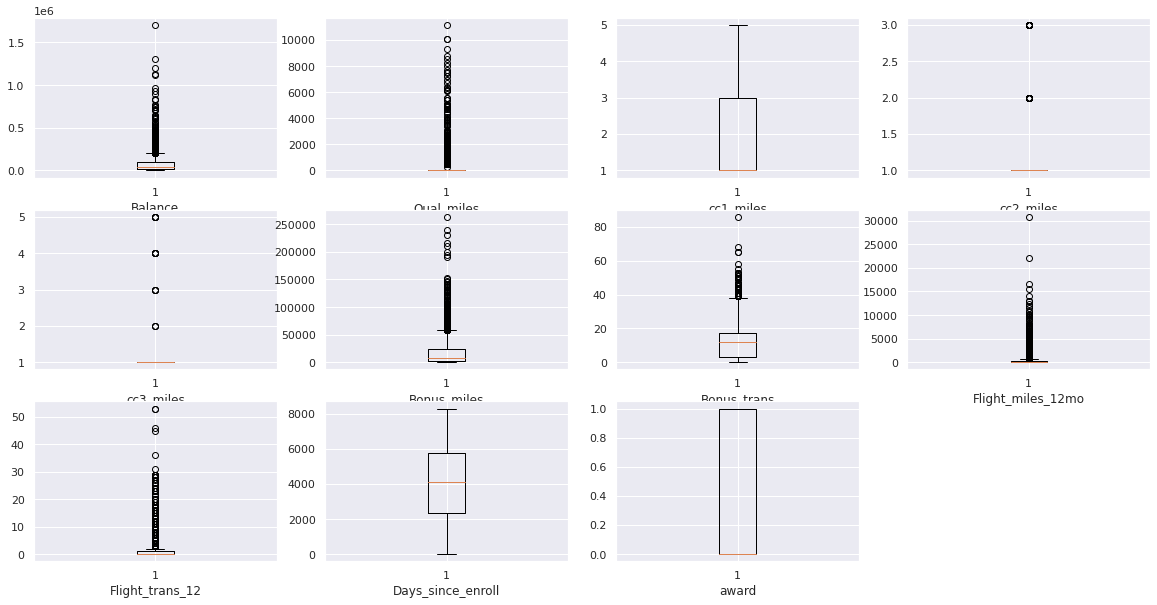

In [ ]:
plt.figure(figsize=(20,10))
for i, column in enumerate(airlines.columns, 1):
  plt.subplot(3,4,i)
  plt.boxplot(airlines[column])
  plt.xlabel(airlines[column].name)

observation:There are outliers in almost all features of the given dataset

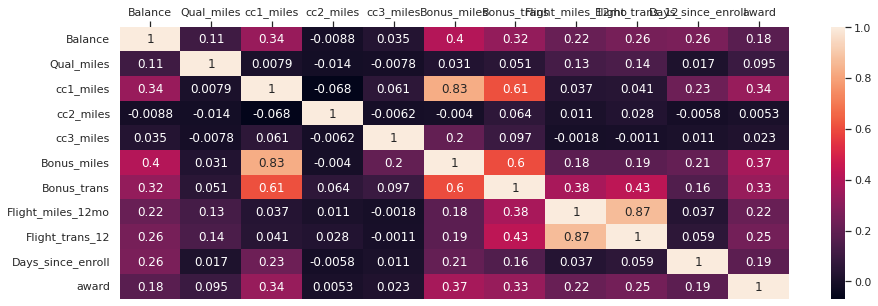

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(15,5))
ax = sns.heatmap(airlines.corr(), annot=True)
ax.xaxis.tick_top()

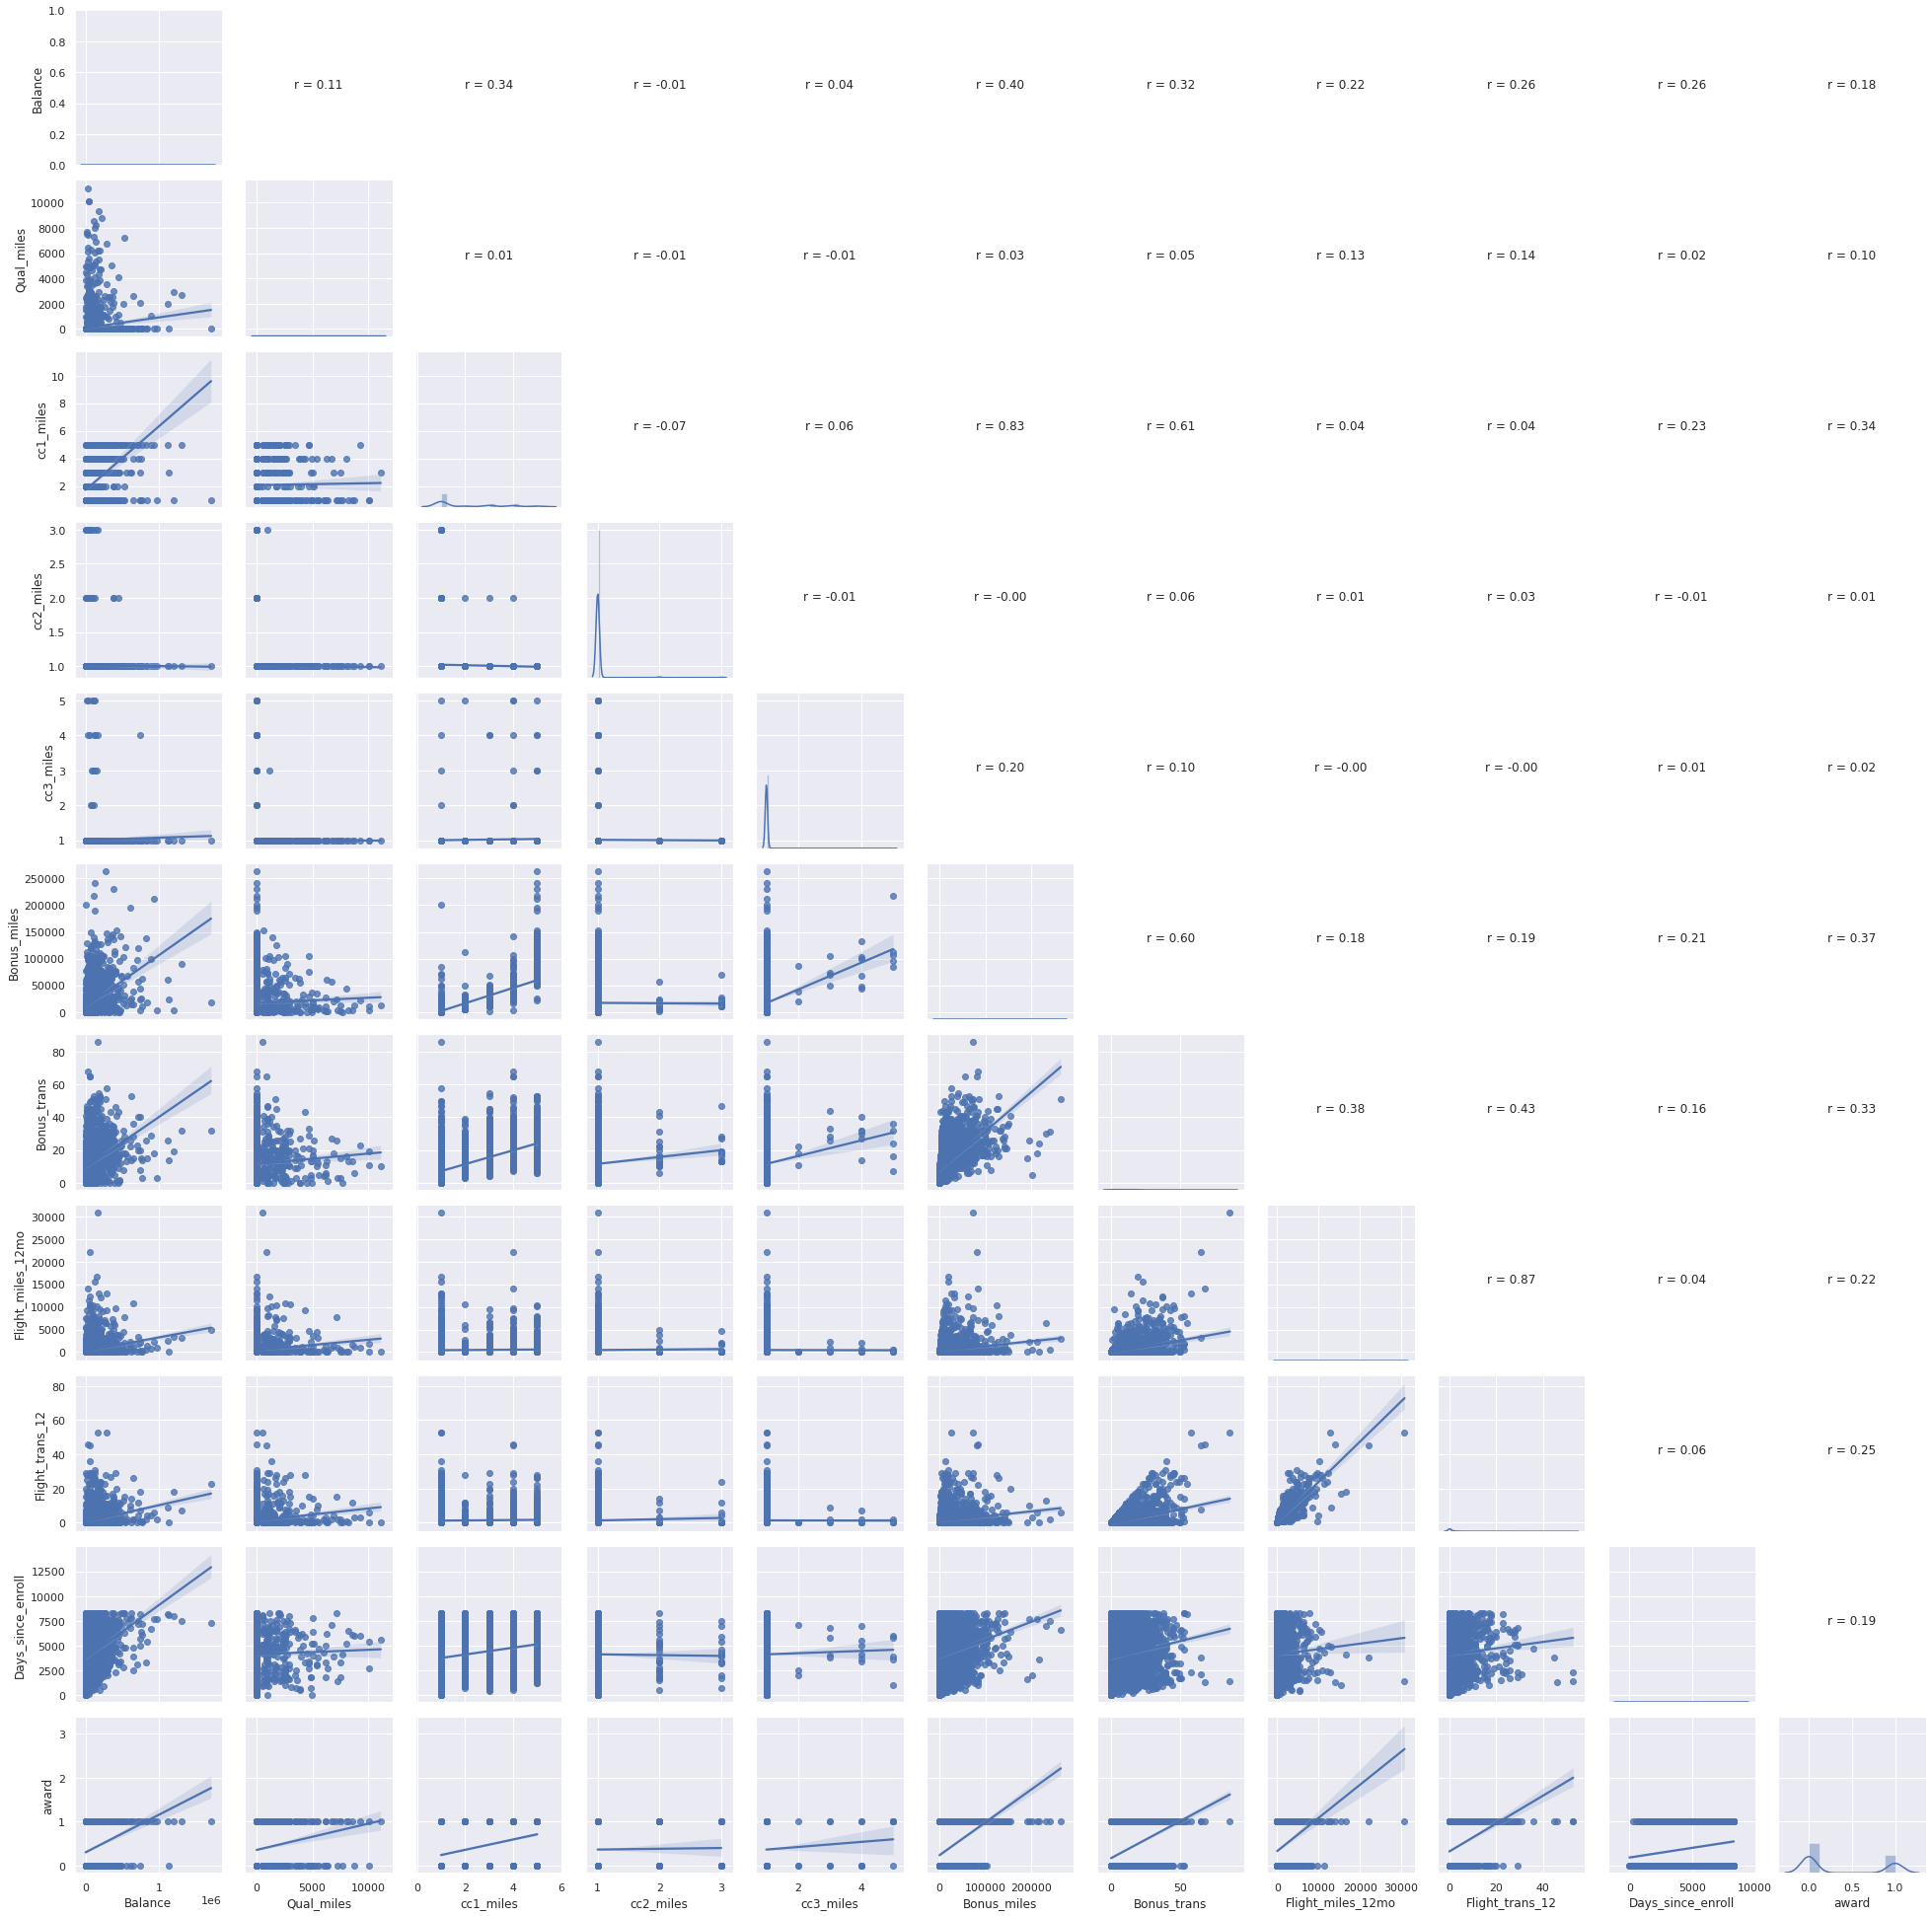

In [ ]:
# create  pairGrid with correlation coefficients
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(airlines)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

##Standardisation

In [ ]:
# Standardisation function  , for normalization MinMaxScalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
airlines_scaled=scaler.fit_transform(airlines)
airlines_scaled

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

## Hierarchical Clustering:

In [ ]:
#silhouette_score
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7]

for n_clusters in n_clusters:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage="complete") 
        hie_labels1 = hie_cluster1.fit_predict(airlines_scaled)
        silhouette_score1 = silhouette_score(airlines_scaled, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with complete linkage :",silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with complete linkage : 0.8111134025692677

For n_clusters = 3 The average silhouette_score with complete linkage : 0.7760836053602842

For n_clusters = 4 The average silhouette_score with complete linkage : 0.5985727763092806

For n_clusters = 5 The average silhouette_score with complete linkage : 0.5625737661941762

For n_clusters = 6 The average silhouette_score with complete linkage : 0.5404241979396106

For n_clusters = 7 The average silhouette_score with complete linkage : 0.5418820074020084



observation: Making 5 clusters will be better for this airlines data.

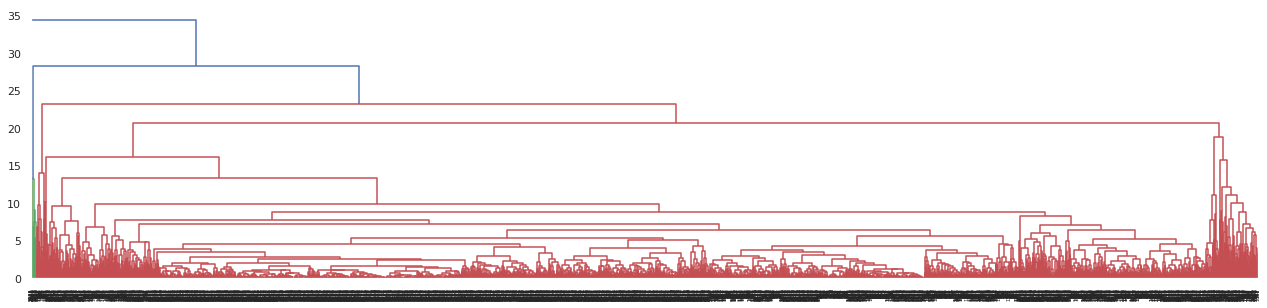

In [ ]:
# dendogram
plt.figure(figsize=(22,5))
dendrogram = sch.dendrogram(sch.linkage(airlines_scaled, method='complete'))

In [ ]:
#creating clusters
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hc.fit(airlines_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [ ]:
#saving clusters for chart ,# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
y_hc=hc.fit_predict(airlines_scaled)
y_hc

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
airlines_hierarchical=airlines.copy()
#adding clusterid col
airlines_hierarchical['h_clusterid']=y_hc
airlines_hierarchical.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,h_clusterid
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [ ]:
airlines_hierarchical.h_clusterid.value_counts()

1    3782
0     170
4      28
2      15
3       4
Name: h_clusterid, dtype: int64

In [ ]:
airlines_hierarchical[airlines_hierarchical.h_clusterid==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,h_clusterid
ID#,,,,,,,,,,,,
9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
43,60313,0,1,1,1,10000,26,3250,9,7829,1,0
51,108137,0,1,1,1,6368,5,6368,5,6844,0,0
60,95118,0,3,1,1,23188,23,2200,7,6865,1,0
66,53914,0,3,1,1,33767,45,5550,29,6826,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3906,126167,0,5,1,1,190160,15,0,0,1612,1,0
3940,130748,0,4,1,1,65510,37,6349,7,1545,0,0
3957,76595,0,1,1,1,10577,2,9577,1,1515,0,0


In [ ]:
airlines_hierarchical[airlines_hierarchical.h_clusterid==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,h_clusterid
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [ ]:
airlines_hierarchical[airlines_hierarchical.h_clusterid==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,h_clusterid
ID#,,,,,,,,,,,,
109,96627,1182,1,1,3,49059,26,2300,9,6738,1,2
389,28193,0,5,1,4,103456,32,0,0,6980,1,2
861,25629,0,4,1,5,107308,36,600,2,5966,1,2
915,15835,0,2,1,5,112171,16,0,0,5825,1,2
1047,154664,0,4,1,3,73881,33,0,0,5769,0,2
1257,166465,0,4,1,4,98717,30,0,0,5531,0,2
1313,737514,0,3,1,4,43993,40,2150,7,5030,0,2
1895,128302,0,5,1,4,132263,32,400,2,4103,1,2
1934,82981,0,5,1,3,105325,44,1000,2,3964,1,2


In [ ]:
airlines_hierarchical[airlines_hierarchical.h_clusterid==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,h_clusterid
ID#,,,,,,,,,,,,
2032,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3257,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3606,160114,500,1,1,1,71954,86,30817,53,1373,1,3
3617,27619,0,4,1,1,83726,68,14050,46,1325,1,3


In [ ]:
airlines_hierarchical[airlines_hierarchical.h_clusterid==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,h_clusterid
ID#,,,,,,,,,,,,
44,619393,0,3,1,1,15008,14,0,0,7819,1,4
74,550367,0,3,1,1,12500,13,50,1,7801,0,4
90,609477,0,3,1,1,21422,22,1200,8,6820,0,4
120,969559,0,1,1,1,2500,3,1000,2,7718,1,4
129,602064,0,5,1,1,194753,26,2250,10,7652,1,4
154,930410,0,5,1,1,211284,18,2250,6,7640,1,4
178,451673,0,4,1,1,43533,19,900,4,7575,1,4
190,707079,0,4,1,1,57173,40,3450,12,7523,1,4
224,1302051,2706,5,1,1,90653,32,3050,7,7467,1,4


In [ ]:
airlines_hierarchical.groupby('h_clusterid').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_clusterid,,,,,,,,,,,
0,117123.664706,255.752941,2.252941,1.341176,1.000000,37437.170588,26.729412,4066.623529,11.882353,4701.688235,0.705882
1,65902.071655,137.370703,2.033580,1.000000,1.000793,15571.369910,10.724484,270.585405,0.818350,4072.294553,0.350344
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,806433.285714,383.214286,3.571429,1.000000,1.000000,58412.321429,21.214286,1344.392857,5.607143,6835.892857,0.857143


In [ ]:
#Visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(airlines_scaled)
pca_2d = pca.transform(airlines_scaled)

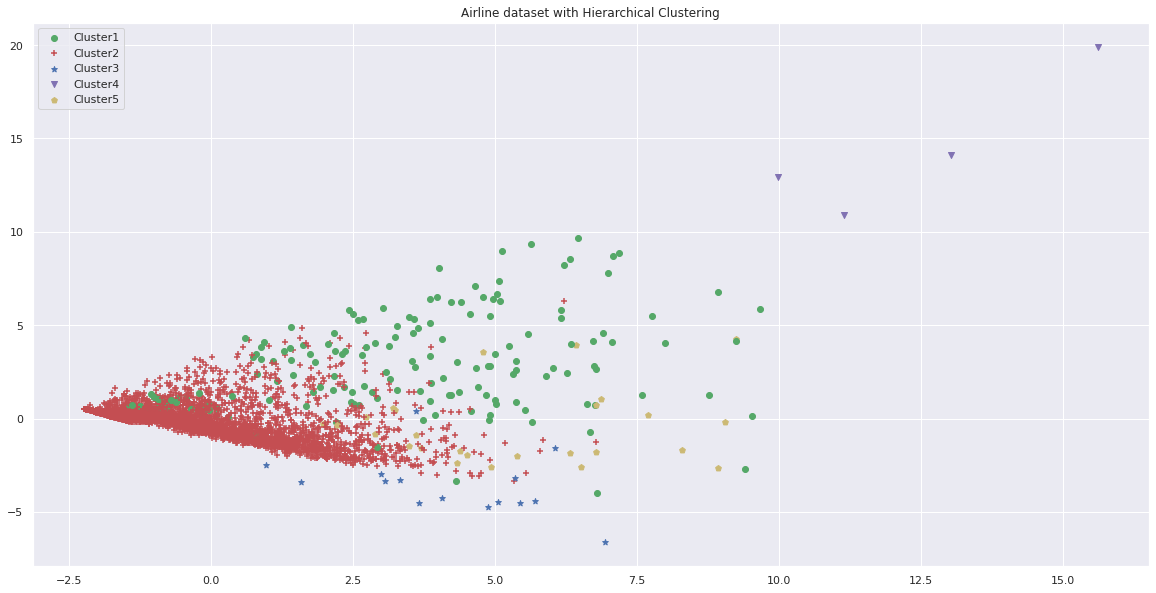

In [ ]:
import pylab as pl
plt.figure(figsize=(20,10))

for i in range(0, pca_2d.shape[0]):
    if y_hc[i]== 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif y_hc[i]==1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif y_hc[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif y_hc[i]== 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='v')
    elif y_hc[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='p')
        
pl.legend([c1, c2, c3, c4, c5], ['Cluster1', 'Cluster2','Cluster3', 'Cluster4','Cluster5'])
pl.title('Airline dataset with Hierarchical Clustering')
pl.show()

## K-Means Clustering

In [ ]:
#  Silhouette score for stadardScaler applied on data.
clusters_list = [2,3,4,5,6,7,8,9]

for n_clusters in clusters_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(airlines_scaled)
    sil_score1= silhouette_score(airlines_scaled, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3256981835090824
For n_clusters = 3 The average silhouette_score is : 0.3121716765282414
For n_clusters = 4 The average silhouette_score is : 0.32563311512799126
For n_clusters = 5 The average silhouette_score is : 0.31819537664378844
For n_clusters = 6 The average silhouette_score is : 0.3338735662323181
For n_clusters = 7 The average silhouette_score is : 0.22085896619040385
For n_clusters = 8 The average silhouette_score is : 0.23657639934232003
For n_clusters = 9 The average silhouette_score is : 0.2984364654012059


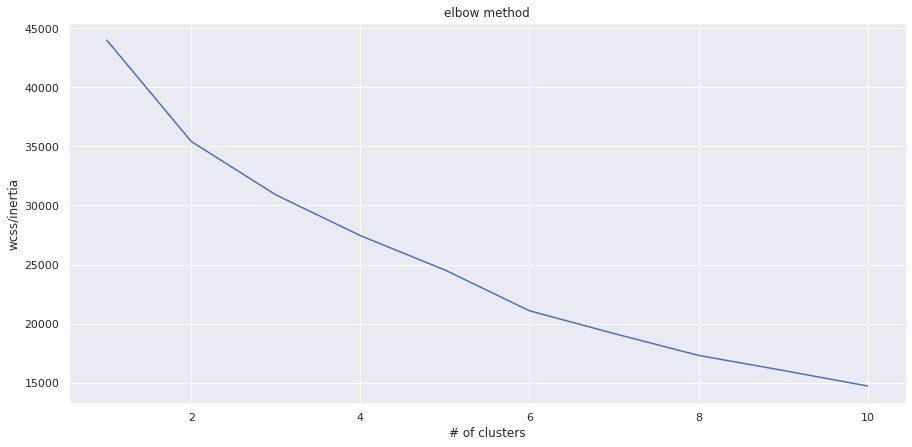

In [ ]:
#elbow method for k value
plt.figure(figsize=(15,7))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airlines_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('elbow method')
plt.xlabel('# of clusters')
plt.ylabel('wcss/inertia')
plt.show()

obsevation: k=5 will be better for clustering.

In [ ]:
#Building Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(airlines_scaled)

KMeans(n_clusters=5, random_state=42)

In [ ]:
clusters_new.labels_

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [ ]:
#Assign clusters to the data set
airlines_kmeans=airlines.copy()
airlines_kmeans['kmeans_clusterid'] = clusters_new.labels_
airlines_kmeans.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,kmeans_clusterid
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [ ]:
airlines_kmeans['kmeans_clusterid'].value_counts()

1    2532
3    1239
0     170
2      43
4      15
Name: kmeans_clusterid, dtype: int64

In [ ]:
airlines_kmeans[airlines_kmeans['kmeans_clusterid']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,kmeans_clusterid
ID#,,,,,,,,,,,,
22,185681,2024,1,1,1,13300,16,1800,9,6896,1,0
23,20584,0,1,1,1,3450,11,3450,11,6884,0,0
43,60313,0,1,1,1,10000,26,3250,9,7829,1,0
51,108137,0,1,1,1,6368,5,6368,5,6844,0,0
66,53914,0,3,1,1,33767,45,5550,29,6826,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3930,126490,0,1,1,1,8808,15,5183,12,1566,0,0
3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,0
3940,130748,0,4,1,1,65510,37,6349,7,1545,0,0


In [ ]:
airlines_kmeans[airlines_kmeans['kmeans_clusterid']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,kmeans_clusterid
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4016,3974,0,1,1,1,365,3,0,0,1397,0,1
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1


In [ ]:
airlines_kmeans[airlines_kmeans['kmeans_clusterid']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,kmeans_clusterid
ID#,,,,,,,,,,,,
9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
202,8669,0,1,3,1,11397,16,0,0,7486,1,2
230,117329,0,1,2,1,6448,11,0,0,7416,1,2
386,167670,0,1,3,1,15907,13,0,0,6994,0,2
398,11189,0,1,2,1,9044,20,0,0,8296,1,2
568,380930,0,2,2,1,22485,25,213,1,6539,1,2
804,55610,0,1,2,1,5095,13,0,0,6151,0,2
951,44824,0,1,3,1,21107,19,2000,4,5916,1,2
1161,84856,0,1,2,1,6894,13,0,0,5547,0,2


In [ ]:
airlines_kmeans[airlines_kmeans['kmeans_clusterid']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,kmeans_clusterid
ID#,,,,,,,,,,,,
5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
7,84914,0,3,1,1,27482,25,0,0,6994,0,3
10,104860,0,3,1,1,28426,28,1150,3,6931,1,3
12,96522,0,5,1,1,61105,19,0,0,6924,1,3
16,28495,0,4,1,1,49442,15,0,0,6912,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4002,57793,0,3,1,1,20959,15,1198,3,1424,1,3
4003,28867,0,3,1,1,19169,28,0,0,1425,0,3
4008,59017,0,4,1,1,34746,25,0,0,1418,0,3


In [ ]:
airlines_kmeans[airlines_kmeans['kmeans_clusterid']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,kmeans_clusterid
ID#,,,,,,,,,,,,
109,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
389,28193,0,5,1,4,103456,32,0,0,6980,1,4
861,25629,0,4,1,5,107308,36,600,2,5966,1,4
915,15835,0,2,1,5,112171,16,0,0,5825,1,4
1047,154664,0,4,1,3,73881,33,0,0,5769,0,4
1257,166465,0,4,1,4,98717,30,0,0,5531,0,4
1313,737514,0,3,1,4,43993,40,2150,7,5030,0,4
1895,128302,0,5,1,4,132263,32,400,2,4103,1,4
1934,82981,0,5,1,3,105325,44,1000,2,3964,1,4


In [ ]:
#these are standardized values.
clusters_new.cluster_centers_


array([[ 1.13984539,  1.05672065,  0.09776869, -0.09824189, -0.06276658,
         0.57151541,  1.51103346,  3.44127553,  3.6610428 ,  0.27107706,
         0.88975067],
       [-0.29035586, -0.05818754, -0.59651518, -0.09824189, -0.06074586,
        -0.51420592, -0.49040819, -0.18783605, -0.19980876, -0.20213465,
        -0.34539972],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.43260424, -0.01954084,  1.22083157, -0.09824189, -0.05447771,
         0.94096329,  0.75568144, -0.09151819, -0.10212979,  0.37689814,
         0.58013031],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [ ]:
airlines_kmeans.groupby('kmeans_clusterid').agg(['mean']).reset_index()

,kmeans_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,188455.641176,961.558824,2.194118,1.000000,1.000000,30945.770588,26.111765,5277.958824,15.258824,4678.300000,0.800000
1,1,44293.077409,98.530806,1.237362,1.000000,1.000395,4722.390205,6.885861,196.838468,0.614929,3699.326619,0.202607
2,2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,3,117119.906376,130.094431,3.736077,1.000000,1.001614,39793.209040,18.843422,332.092010,0.987086,4897.692494,0.651332
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [ ]:
#Visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(airlines_scaled)
pca_2d = pca.transform(airlines_scaled)

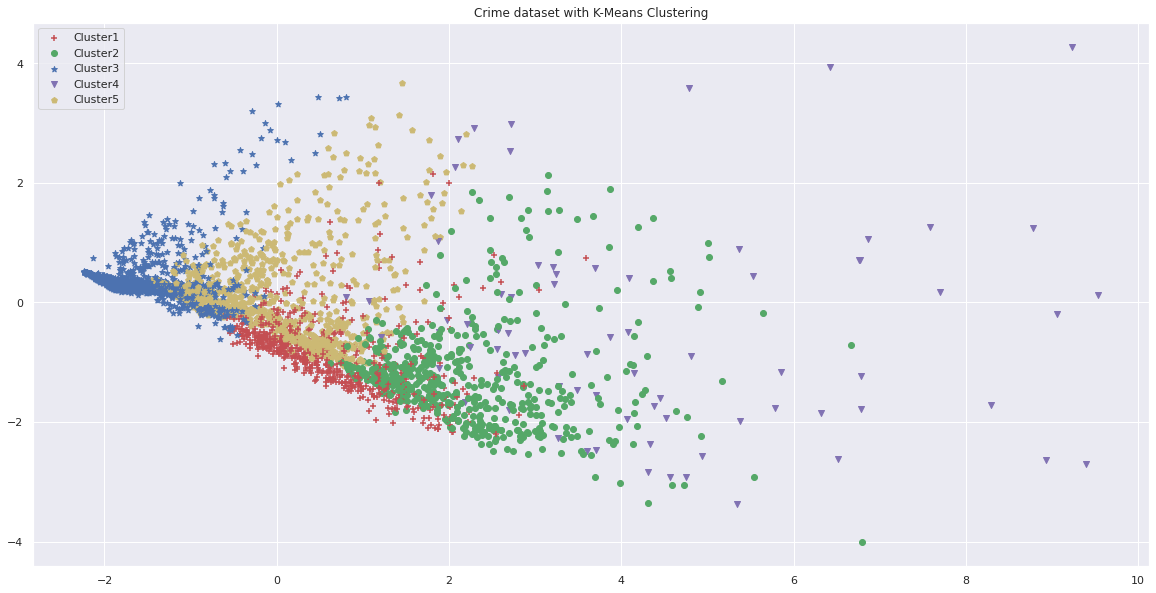

In [ ]:
import pylab as pl
plt.figure(figsize=(20,10))
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif kmeans.labels_[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='v')
    elif kmeans.labels_[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='p')
        
pl.legend([c1, c2, c3, c4,c5], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4','Cluster5'])
pl.title('Crime dataset with K-Means Clustering')
pl.show()

##DBSCAN clustering

In [ ]:
dbscan=DBSCAN(eps=1,min_samples=10)
dbscan.fit_predict(airlines_scaled)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
airlines_dbscan=airlines.copy()
airlines_dbscan['dbscan_clusterid'] = dbscan.labels_
airlines_dbscan['dbscan_clusterid'].value_counts()

 0    2281
 1    1033
-1     675
 2      10
Name: dbscan_clusterid, dtype: int64

In [ ]:
airlines_dbscan.groupby('dbscan_clusterid').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
dbscan_clusterid,,,,,,,,,,,
-1,171415.789630,835.048889,2.645926,1.071111,1.072593,37168.734815,20.888889,2019.174815,5.838519,4637.044444,0.663704
0,52122.980710,2.468216,1.649715,1.000000,1.000000,8876.730820,8.348970,106.819816,0.359053,3794.305129,0.000000
1,57560.314618,6.801549,2.591481,1.000000,1.000000,22401.674734,12.715392,225.715392,0.709584,4507.369797,1.000000
2,27372.700000,0.000000,1.000000,2.000000,1.000000,8459.100000,11.700000,0.000000,0.000000,2919.100000,0.000000


In [ ]:
airlines_dbscan[airlines_dbscan.dbscan_clusterid==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,dbscan_clusterid
ID#,,,,,,,,,,,,
5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
22,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
23,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
25,205651,500,1,1,1,4025,21,700,4,7932,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3957,76595,0,1,1,1,10577,2,9577,1,1515,0,-1
3973,59650,0,1,1,1,5050,16,3950,13,1476,0,-1
3984,131125,862,1,1,1,4993,11,50,1,1443,0,-1


In [ ]:
airlines_dbscan[airlines_dbscan.dbscan_clusterid==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,dbscan_clusterid
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4014,39142,0,3,1,1,14981,28,0,0,1408,0,0
4015,11181,0,1,1,1,929,12,0,0,1407,0,0
4016,3974,0,1,1,1,365,3,0,0,1397,0,0


In [ ]:
airlines_dbscan[airlines_dbscan.dbscan_clusterid==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,dbscan_clusterid
ID#,,,,,,,,,,,,
8,20856,0,1,1,1,5250,4,250,1,6938,1,1
10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
12,96522,0,5,1,1,61105,19,0,0,6924,1,1
16,28495,0,4,1,1,49442,15,0,0,6912,1,1
17,51890,0,4,1,1,48963,16,0,0,6910,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4010,11933,0,1,1,1,249,3,79,1,1412,1,1
4012,2622,0,1,1,1,1625,6,0,0,1404,1,1
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1


In [ ]:
airlines_dbscan[airlines_dbscan.dbscan_clusterid==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,dbscan_clusterid
ID#,,,,,,,,,,,,
1556,36887,0,1,2,1,9048,11,0,0,4951,0,2
1993,11961,0,1,2,1,11961,10,0,0,4646,0,2
2335,10458,0,1,2,1,10458,12,0,0,3726,0,2
2440,41062,0,1,2,1,8275,11,0,0,3356,0,2
2763,42970,0,1,2,1,7889,14,0,0,2256,0,2
2928,17769,0,1,2,1,5165,10,0,0,1807,0,2
3177,21736,0,1,2,1,6672,10,0,0,2544,0,2
3213,56624,0,1,2,1,12311,14,0,0,2491,0,2
3382,20318,0,1,2,1,6990,13,0,0,1956,0,2


In [ ]:
#Visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(airlines_scaled)
pca_2d = pca.transform(airlines_scaled)

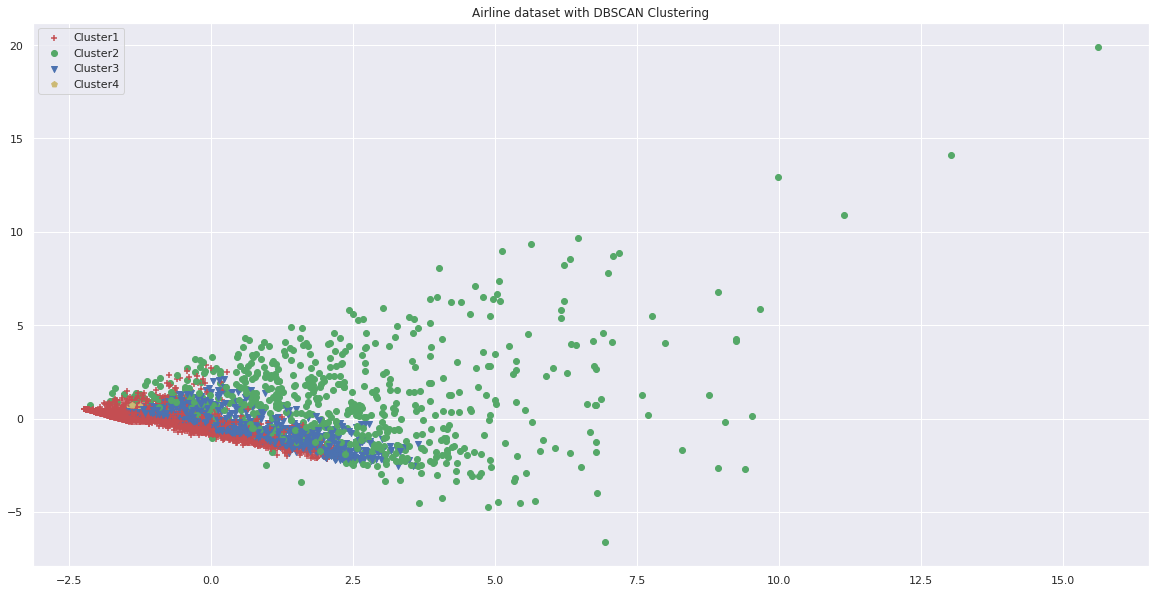

In [ ]:
import pylab as pl
plt.figure(figsize=(20,10))

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif dbscan.labels_[i] == -1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == 1:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='v')
    elif dbscan.labels_[i] == 2:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='p')
        
pl.legend([c1, c2, c3,c4], ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])
pl.title('Airline dataset with DBSCAN Clustering')
pl.show()

#Conclusion:

* In each cluster method, the second cluster has more points when compared to the other clusters.
*   The clustering methods, hierarchical and K-means, almost same in clustering for the given data.
*   DBSCAN is providing the clearest picture of the three clustering methods by grouping similar records into a single cluster for the given dataset.




---

                                                                  THANK YOU



---



